<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

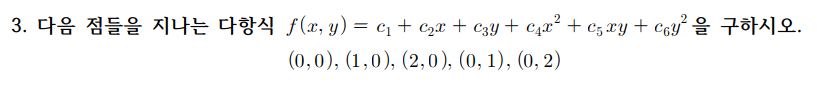

In [2]:
x_data = np.array([0, 1, 2, 0, 0])
y_data = np.array([0, 0, 0, 1, 2])

In [7]:
x_data = np.array([0, 1, 2, 0, 0])
y_data = np.array([0, 0, 0, 1, 2])

def polynomial_function(x,y,a,b,c,d,e,f,g):
    return a + b*x + c*y + d * x**2 + e*x*y + f * y**2

params, covariance = curve_fit(polynomial_function, x_data, y_data)
a, b, c, d, e, f = params

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 주어진 데이터 포인트
x_data = np.array([0, 1, 2, 0, 0])
y_data = np.array([0, 0, 0, 1, 2])
f_data = np.array([a + b*x + c*y + d*x**2 + e*x*y + f*y**2 for x, y in zip(x_data, y_data)])

# 다항식 함수 정의
def polynomial_function(coords, a, b, c, d, e, f):
    x, y = coords
    return a + b * x + c * y + d * x**2 + e * x * y + f * y**2

# Curve fitting 수행
params, covariance = curve_fit(polynomial_function, (x_data, y_data), f_data)
a, b, c, d, e, f = params

# 적합된 다항식 함수 정의
def fitted_function(x, y):
    return a + b * x + c * y + d * x**2 + e * x * y + f * y**2

# 적합된 곡선 그리기
x_fit = np.linspace(0, 2, 100)
y_fit = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x_fit, y_fit)
Z = fitted_function(X, Y)

plt.figure()
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.scatter(x_data, y_data, label='데이터 포인트', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('다항식 곡선 맞춤 결과')
plt.show()


In [24]:
import numpy as np

# 3x3 행렬 정의
matrix = np.array([[1, 0, 2],
                  [-3, 1, 4],
                  [2, -3, 4]])

# 역행렬을 구하기 전에 역행렬이 존재하는지 확인합니다.
determinant = np.linalg.det(matrix)
print('determinant :',determinant)

if determinant != 0:
    # 역행렬을 계산
    inverse_matrix = np.linalg.inv(matrix)
    print("역행렬:\n", inverse_matrix)
else:
    print("역행렬이 존재하지 않습니다. (행렬식이 0입니다.)")


determinant : 30.000000000000004
역행렬:
 [[ 5.33333333e-01 -2.00000000e-01 -6.66666667e-02]
 [ 6.66666667e-01 -4.75809868e-17 -3.33333333e-01]
 [ 2.33333333e-01  1.00000000e-01  3.33333333e-02]]


In [17]:
determinant = np.linalg.det(matrix)

In [18]:
determinant

30.000000000000004

In [19]:
matrix = np.array([[1,2,-1],
                  [-4,-7,3],
                  [-2,-6,4]])

In [20]:
determinant = np.linalg.det(matrix)

In [21]:
determinant

0.0